In [1]:
%load_ext autoreload
%autoreload 2

In [33]:
import pandas as pd
import visidata as vd
import numpy as np
from datetime import datetime
import dateutil as du
import date_library as datelib
import matplotlib.pyplot as plt
import utils as u

In [ ]:
fn = "MEMBERS_ACTIVITY.csv"
#fn = "aa.csv"
# nb_rows = 100000
nb_rows = 500000
nb_rows = None
# nb_rows = None # read all rows
# df = pd.read_csv("top100k.csv", nrows=nb_rows, encoding = "ISO-8859-1", infer_datetime_format=True, parse_dates=True)
df = pd.read_csv(fn, nrows=nb_rows, encoding = "ISO-8859-1", infer_datetime_format=True, parse_dates=True)

/Users/erlebach/opt/anaconda3/envs/torch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (37,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df0 = df.copy()
df.shape

(7853770, 72)

In [42]:
dfg = df0.groupby('MEMBER_ID')
nb_segments = dfg.size().sort_values(ascending=False)

In [11]:
nb_segments[nb_segments > 50].shape

(44202,)

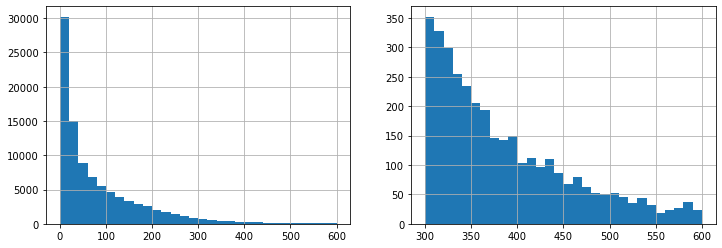

In [12]:
# 94598 members
# max number trip segments by one member: 2808
# min number trip segments by one member
# number of members with more than 50 segments: 44202
# number of members with more than 500 segments: 577

fig = plt.figure(figsize=(12,4))
fig.add_subplot(1,2,1)
plt.hist(nb_segments, bins=30, range=[0,600]);
plt.grid(True)
fig.add_subplot(1,2,2)
plt.hist(nb_segments, bins=30, range=[300,600]);
plt.grid(True)

In [13]:
miles_count = ('MILES_BALANCE', 'count')

In [14]:
dfg.get_group(230025672).describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_ID,2808.0,2.300257e+08,0.000000e+00,230025672.0,230025672.0,230025672.0,2.300257e+08,230025672.0
MILES_BALANCE,2808.0,4.460069e+06,0.000000e+00,4460069.0,4460069.0,4460069.0,4.460069e+06,4460069.0
TOTAL_MILES_SINCE_ENROLLMENT,2808.0,3.366436e+07,0.000000e+00,33664356.0,33664356.0,33664356.0,3.366436e+07,33664356.0
ACTIVITY_ID,2808.0,2.703419e+07,6.378558e+06,4335.0,23159255.0,27051157.5,3.252789e+07,37424590.0
ACTIVITY_SCENARIO_GROUP,2808.0,5.667735e+00,1.166416e+00,1.0,6.0,6.0,6.000000e+00,8.0
ACTIVITY_SCENARIO,2808.0,1.236325e+01,2.701217e+00,1.0,13.0,13.0,1.300000e+01,18.0
TICKET_COUPON_NUMBER,2586.0,1.446636e+00,5.454704e-01,1.0,1.0,1.0,2.000000e+00,4.0
REVENUE_AMOUNT,1105.0,2.958895e+01,1.119848e+02,0.0,0.0,0.0,0.000000e+00,1110.0
AWARD_MILES,326.0,1.032649e+05,2.838341e+05,0.0,1000.0,3852.0,6.022000e+03,1912265.0
REDEEMED_MILES,2482.0,-1.176643e+04,1.443816e+04,-255285.0,-18000.0,-6750.0,0.000000e+00,0.0


In [43]:
dfid = df0[df0['MEMBER_ID'] == 230025672]

In [44]:
dfid.BOOKING_DATE

235299           NaN
235300           NaN
235301    1900-01-01
235302           NaN
235303    1900-01-01
             ...    
238102           NaN
238103           NaN
238104           NaN
238105           NaN
238106           NaN
Name: BOOKING_DATE, Length: 2808, dtype: object

In [17]:
dfid.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_ID,2808.0,2.300257e+08,0.000000e+00,230025672.0,230025672.0,230025672.0,2.300257e+08,230025672.0
MILES_BALANCE,2808.0,4.460069e+06,0.000000e+00,4460069.0,4460069.0,4460069.0,4.460069e+06,4460069.0
TOTAL_MILES_SINCE_ENROLLMENT,2808.0,3.366436e+07,0.000000e+00,33664356.0,33664356.0,33664356.0,3.366436e+07,33664356.0
ACTIVITY_ID,2808.0,2.703419e+07,6.378558e+06,4335.0,23159255.0,27051157.5,3.252789e+07,37424590.0
ACTIVITY_SCENARIO_GROUP,2808.0,5.667735e+00,1.166416e+00,1.0,6.0,6.0,6.000000e+00,8.0
ACTIVITY_SCENARIO,2808.0,1.236325e+01,2.701217e+00,1.0,13.0,13.0,1.300000e+01,18.0
TICKET_COUPON_NUMBER,2586.0,1.446636e+00,5.454704e-01,1.0,1.0,1.0,2.000000e+00,4.0
REVENUE_AMOUNT,1105.0,2.958895e+01,1.119848e+02,0.0,0.0,0.0,0.000000e+00,1110.0
AWARD_MILES,326.0,1.032649e+05,2.838341e+05,0.0,1000.0,3852.0,6.022000e+03,1912265.0
REDEEMED_MILES,2482.0,-1.176643e+04,1.443816e+04,-255285.0,-18000.0,-6750.0,0.000000e+00,0.0


In [18]:
dfg_summary = dfg[['TOTAL_MILES_SINCE_ENROLLMENT', 'MILES_BALANCE','AWARD_MILES']].agg( ['count', 'mean','std'] )
print(dfg_summary.columns)
dfg_summary = dfg_summary[dfg_summary[miles_count] > 1]

MultiIndex([('TOTAL_MILES_SINCE_ENROLLMENT', 'count'),
            ('TOTAL_MILES_SINCE_ENROLLMENT',  'mean'),
            ('TOTAL_MILES_SINCE_ENROLLMENT',   'std'),
            (               'MILES_BALANCE', 'count'),
            (               'MILES_BALANCE',  'mean'),
            (               'MILES_BALANCE',   'std'),
            (                 'AWARD_MILES', 'count'),
            (                 'AWARD_MILES',  'mean'),
            (                 'AWARD_MILES',   'std')],
           )


In [19]:
dfg_summary.sort_values(miles_count, ascending=False)

TOTAL_MILES_SINCE_ENROLLMENT                  MILES_BALANCE  \
                                 count        mean  std         count   
MEMBER_ID                                                               
230025672                         2808  33664356.0  0.0          2808   
232920437                         2400    871130.0  0.0          2400   
230248747                         2307   1011352.0  0.0          2307   
230016244                         2276   1255056.0  0.0          2276   
231204505                         2201  26319865.0  0.0          2201   
...                                ...         ...  ...           ...   
253972742                            2      3000.0  0.0             2   
244839864                            2      4146.0  0.0             2   
233815623                            2        18.0  0.0             2   
267090366                            2        76.0  0.0             2   
271730994                            2       940.0  0.0             2   

                          AWARD_MILES                                
                mean  std       count           mean            std  
MEMBER_ID                                                            
230025672  4460069.0  0.0         326  103264.895706  283834.115712  
232920437   142013.0  0.0        2350     370.693617    1251.334617  
230248747   343041.0  0.0        2250     449.489778    1531.280800  
230016244   462063.0  0.0        2227     563.563538    3742.018572  
231204505  1625373.0  0.0         401   65635.573566  267804.623796  
...              ...  ...         ...            ...            ...  
253972742        0.0  0.0           1    3000.000000            NaN  
244839864     4146.0  0.0           2    2073.000000    2931.664715  
233815623        0.0  0.0           1      18.000000            NaN  
267090366       76.0  0.0           2      38.000000      22.627417  
271730994      940.0  0.0           2     470.000000     371.938167  

[93847 rows x 9 columns]

In [20]:
miles_bal_count = ('MILES_BALANCE', 'count')
miles_bal_std = ('MILES_BALANCE', 'std')
award_miles_std = ('AWARD_MILES', 'std')

In [21]:
dfg_summary[award_miles_std].describe().astype(int)

count       93753
mean         2727
std        116283
min             0
25%          1064
50%          1620
75%          2559
max      27561634
Name: (AWARD_MILES, std), dtype: int64

In [46]:
dfg_summary.sort_values(('MILES_BALANCE','count')).tail()

TOTAL_MILES_SINCE_ENROLLMENT                  MILES_BALANCE  \
                                 count        mean  std         count   
MEMBER_ID                                                               
231204505                         2201  26319865.0  0.0          2201   
230016244                         2276   1255056.0  0.0          2276   
230248747                         2307   1011352.0  0.0          2307   
232920437                         2400    871130.0  0.0          2400   
230025672                         2808  33664356.0  0.0          2808   

                          AWARD_MILES                                
                mean  std       count           mean            std  
MEMBER_ID                                                            
231204505  1625373.0  0.0         401   65635.573566  267804.623796  
230016244   462063.0  0.0        2227     563.563538    3742.018572  
230248747   343041.0  0.0        2250     449.489778    1531.280800  
232920437   142013.0  0.0        2350     370.693617    1251.334617  
230025672  4460069.0  0.0         326  103264.895706  283834.115712

In [23]:
xmean = dfg.mean()
xstd = dfg.std()

In [25]:
df.dtypes[df.dtypes != object].head(50)

MEMBER_ID                         int64
MILES_BALANCE                     int64
TOTAL_MILES_SINCE_ENROLLMENT      int64
ACTIVITY_ID                       int64
ACTIVITY_SCENARIO_GROUP           int64
ACTIVITY_SCENARIO                 int64
TICKET_COUPON_NUMBER            float64
REVENUE_AMOUNT                  float64
AWARD_MILES                     float64
REDEEMED_MILES                  float64
AMOUNT_OF_BAGS                  float64
dtype: object

---
## Clean the DataFrame
* Convert dates to seconds since sometime in 1970
* Convert float columns to ints. 

In [47]:
df1 = u.clean_dataframe(df)

/Users/erlebach/src/2022/copa_recommender_systems/date_library.py:21: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  return pd.to_datetime(date_series).astype('int') // 1000000000


In [35]:
df1.nunique().head()

KeyboardInterrupt: 

In [36]:
df1.iloc[0].T.head()

MEMBER_ID                  100031203
TIER_LEVEL                        T1
TIER_LEVEL_DESCRIPTION        Silver
PREVIOUS_TIER                     B0
LAST_TIER_CHANGE_DATE     1601336571
Name: 0, dtype: object

In [40]:
df.head()

,MEMBER_ID,TIER_LEVEL,TIER_LEVEL_DESCRIPTION,PREVIOUS_TIER,LAST_TIER_CHANGE_DATE,STATUS,ENROLL_DATE,GENDER,BIRTH_DATE,NATIONALITY,...,HOLDING_ORIGIN_REGION,HOLDING_DESTINATION_REGION,HOLDING_ORIGIN_COUNTRY,HOLDING_DESTINATION_COUNTRY,SEGMENT_ORIGIN_REGION,SEGMENT_DESTINATION_REGION,SEGMENT_ORIGIN_COUNTRY,SEGMENT_DESTINATION_COUNTRY,AMOUNT_OF_BAGS,SEAT_ASSIGNMENT
0,100031203,T1,Silver,B0,1601336571,AC,1480809600,M,-248659200,Panama,...,HUB,CAM,PANAMA,COSTA RICA,HUB,CAM,PANAMA,COSTA RICA,1,19F
1,100031203,T1,Silver,B0,1601336571,AC,1480809600,M,-248659200,Panama,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,100031203,T1,Silver,B0,1601336571,AC,1480809600,M,-248659200,Panama,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,100031203,T1,Silver,B0,1601336571,AC,1480809600,M,-248659200,Panama,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,100031203,T1,Silver,B0,1601336571,AC,1480809600,M,-248659200,Panama,...,CAM,HUB,COSTA RICA,PANAMA,CAM,HUB,COSTA RICA,PANAMA,1,20D


## Extract useful columns to reduce data size

In [74]:
useful_cols = ['MEMBER_ID', 'BOOKING_DATE', 'FLIGHT_DATE','TICKET_SALES_DATE', 'REVENUE_AMOUNT', 'AWARD_MILES', 'FLOWN_CLASS', 'AMOUNT_OF_BAGS', 'TRUE_OD', 'SEGMENT_OD', 'SEGMENT_ORIGIN_REGION', 
               'SEGMENT_DESTINATION_REGION', 'SEGMENT_ORIGIN_COUNTRY', 'SEGMENT_DESTINATION_COUNTRY']

reduced_df = df[useful_cols]

In [75]:
df.size, reduced_df.size, df.shape, reduced_df.shape

(565471440, 109952780, (7853770, 72), (7853770, 14))

In [76]:
reduced_df.to_csv("reduced_member_activity_all_rows.csv", index=0)

In [78]:
df2 = pd.read_csv("reduced_member_activity_all_rows.csv")

In [79]:
days = (df2.FLIGHT_DATE - df2.TICKET_SALES_DATE) / (3600*24)
daysneg = days[days < 0]
daysneg.shape

(991,)

In [83]:
df[df['MEMBER_ID'] == 230002358][['BOOKING_DATE','TICKET_SALES_DATE','FLIGHT_DATE']].head(50)

,BOOKING_DATE,TICKET_SALES_DATE,FLIGHT_DATE
45795,-1,-1,-1
45796,-2208988800,-1,1436140800
45797,-2208988800,-1,1436140800
45798,-2208988800,-1,1436227200
45799,-2208988800,-1,1436227200
45800,-1,-1,-1
45801,-1,-1,-1
45802,-2208988800,-1,1436486400
45803,-2208988800,-1,1436486400
45804,-2208988800,-1,1439164800


In [82]:
df2[df2['MEMBER_ID'] == 230002358].head(50)

,MEMBER_ID,BOOKING_DATE,FLIGHT_DATE,TICKET_SALES_DATE,REVENUE_AMOUNT,AWARD_MILES,FLOWN_CLASS,AMOUNT_OF_BAGS,TRUE_OD,SEGMENT_OD,SEGMENT_ORIGIN_REGION,SEGMENT_DESTINATION_REGION,SEGMENT_ORIGIN_COUNTRY,SEGMENT_DESTINATION_COUNTRY,sale_2_flight_days
45795,230002358,-1,-1,-1,-1,1000,-1,-1,-1,-1,-1,-1,-1,-1,0.000000
45796,230002358,-2208988800,1436140800,-1,-1,1472,R,0,-1,PTY-GUA,HUB,CAM,PANAMA,GUATEMALA,16622.000012
45797,230002358,-2208988800,1436140800,-1,-1,2373,Z,0,-1,MCO-PTY,EASTNAM,HUB,UNITED STATES,PANAMA,16622.000012
45798,230002358,-2208988800,1436227200,-1,-1,1113,Z,0,-1,PTY-UIO,HUB,NEA,PANAMA,ECUADOR,16623.000012
45799,230002358,-2208988800,1436227200,-1,-1,1472,Z,0,-1,GUA-PTY,CAM,HUB,GUATEMALA,PANAMA,16623.000012
45800,230002358,-1,-1,-1,-1,1000,-1,-1,-1,-1,-1,-1,-1,-1,0.000000
45801,230002358,-1,-1,-1,-1,2000,-1,-1,-1,-1,-1,-1,-1,-1,0.000000
45802,230002358,-2208988800,1436486400,-1,-1,1549,Z,0,-1,GYE-PTY,NEA,HUB,ECUADOR,PANAMA,16626.000012
45803,230002358,-2208988800,1436486400,-1,-1,1682,Z,0,-1,PTY-GUA,HUB,CAM,PANAMA,GUATEMALA,16626.000012
45804,230002358,-2208988800,1439164800,-1,-1,931,Z,0,-1,GUA-SJO,CAM,CAM,GUATEMALA,COSTA RICA,16657.000012


In [80]:
df2['sale_2_flight_days'] = (df2.FLIGHT_DATE - df2.TICKET_SALES_DATE) / (3600*24)

In [81]:
df2[(df2['sale_2_flight_days'] < 0) & (df2['FLIGHT_DATE'] != -1)]

,MEMBER_ID,BOOKING_DATE,FLIGHT_DATE,TICKET_SALES_DATE,REVENUE_AMOUNT,AWARD_MILES,FLOWN_CLASS,AMOUNT_OF_BAGS,TRUE_OD,SEGMENT_OD,SEGMENT_ORIGIN_REGION,SEGMENT_DESTINATION_REGION,SEGMENT_ORIGIN_COUNTRY,SEGMENT_DESTINATION_COUNTRY,sale_2_flight_days
45819,230002358,-2208988800,1446076800,1635465600,-1,1742,D,0,GYE-PTY,GYE-PTY,NEA,HUB,ECUADOR,PANAMA,-2192.0
52013,230003036,-1,1483574400,1484524800,-1,-1,-1,0,-1,JFK-PTY,EASTNAM,HUB,UNITED STATES,PANAMA,-11.0
52994,230003128,-1,1520812800,1522195200,-1,-1,-1,0,-1,PTY-LIM,HUB,NEA,PANAMA,PERU,-16.0
60662,230003924,-1,1486425600,1507507200,-1,-1,-1,0,-1,CUN-PTY,MEX,HUB,MEXICO,PANAMA,-244.0
60663,230003924,-1,1486425600,1507507200,-1,-1,-1,0,-1,PTY-MIA,HUB,EASTNAM,PANAMA,UNITED STATES,-244.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7584441,253626264,1621555200,1621555200,1621641600,1214,1915,C,0,CCS-MEX,CCS-PTY,VEN,HUB,VENEZUELA,PANAMA,-1.0
7710580,257892237,-1,1610236800,1635379200,-1,-1,-1,0,-1,GRU-PTY,BRA,HUB,BRAZIL,PANAMA,-291.0
7710581,257892237,-1,1610236800,1635379200,-1,-1,-1,0,-1,PTY-SJO,HUB,CAM,PANAMA,COSTA RICA,-291.0
7718340,258384267,1584662400,1584576000,1584662400,336,4517,D,2,LAX-GRU,LAX-PTY,WESTNAM,HUB,UNITED STATES,PANAMA,-1.0
